In [1]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

# import pandas as pd
# import seaborn as sns
# import warnings

from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

In [3]:
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='loss', value=0.01, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            print("Early stopping requires %s available!" % self.monitor)
            exit()

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
#Adjust training set
N = 5
i = 0
x_train = x_train[i:i+N,:]
print(x_train.shape)

(5, 784)


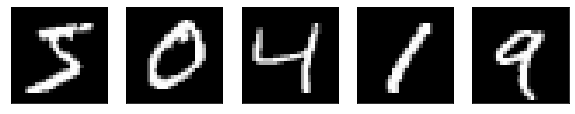

In [7]:
dims = (28, 28)
plt.figure(figsize=(10, 4.5))
for i in range(N):
    # plot original image
    ax = plt.subplot(2, N, i + 1)
    plt.imshow(x_train[i].reshape(*dims))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

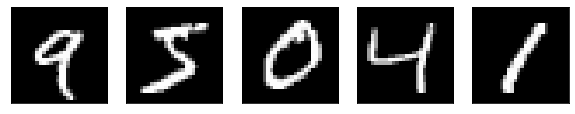

In [8]:
x_shift = np.roll(x_train,1,axis=0)
dims = (28, 28)
plt.figure(figsize=(10, 4.5))
for i in range(N):
    # plot original image
    ax = plt.subplot(2, N, i + 1)
    plt.imshow(x_shift[i].reshape(*dims))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [9]:
#Hyperparameters
input_size = 784
#Number of nodes per hidden layer
hidden_size = 256
#Number of hidden layers
num_hidden = 31
#Number of nodes in the middle layer. Smaller size results in more compression.
code_size = 32

In [10]:
# input_img = Input(shape=(input_size,))
# hidden_1 = Dense(hidden_size, activation='relu')(input_img)
# code = Dense(code_size, activation='relu')(hidden_1)
# hidden_2 = Dense(hidden_size, activation='relu')(code)
# output_img = Dense(input_size, activation='sigmoid')(hidden_2)

In [11]:
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
hidden_2 = Dense(hidden_size, activation='relu')(hidden_1)
hidden_3 = Dense(hidden_size, activation='relu')(hidden_2)
hidden_4 = Dense(hidden_size, activation='relu')(hidden_3)
hidden_5 = Dense(hidden_size, activation='relu')(hidden_4)
hidden_6 = Dense(hidden_size, activation='relu')(hidden_5)
hidden_7 = Dense(hidden_size, activation='relu')(hidden_6)
hidden_8 = Dense(hidden_size, activation='relu')(hidden_7)
hidden_9 = Dense(hidden_size, activation='relu')(hidden_8)
hidden_10 = Dense(hidden_size, activation='relu')(hidden_9)
hidden_11 = Dense(hidden_size, activation='relu')(hidden_10)
output_img = Dense(input_size, activation='sigmoid')(hidden_11)

In [12]:
callbacks = [
    EarlyStoppingByLossVal(monitor='loss', value=0.001, verbose=1),
]

In [13]:
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x=x_train, y=x_shift, epochs=5000)

Epoch 1/5000
5/5 [==============================] - 0s 61ms/step - loss: 0.2310
Epoch 2/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.2304
Epoch 3/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.2290
Epoch 4/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.2246
Epoch 5/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.2132
Epoch 6/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.1885
Epoch 7/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.1512
Epoch 8/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.1246
Epoch 9/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.1123
Epoch 10/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0985
Epoch 11/5000
5/5 [==============================] - 0s 982us/step - loss: 0.0866
Epoch 12/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0790
Epoch 13/5000
5/5 [===========================

Epoch 104/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 105/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 106/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 107/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 108/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 109/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 110/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 111/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 112/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 113/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 114/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 115/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 116/5000
5/5 [========

5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 206/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 207/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 208/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 209/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 210/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 211/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 212/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 213/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 214/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 215/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 216/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 217/5000
5/5 [=======================

Epoch 307/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 308/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 309/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 310/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 311/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 312/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 313/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 314/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 315/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 316/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 317/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 318/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 319/5000
5/5 [========

5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 409/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 410/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 411/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 412/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 413/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 414/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 415/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 416/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 417/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 418/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 419/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 420/5000
5/5 [=======================

Epoch 510/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 511/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 512/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 513/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 514/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 515/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 516/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 517/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 518/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 519/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 520/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 521/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 522/5000
5/5 [========

5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 612/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 613/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 614/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 615/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 616/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 617/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 618/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 619/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 620/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 621/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 622/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 623/5000
5/5 [=======================

Epoch 713/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 714/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 715/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 716/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 717/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 718/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 719/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 720/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 721/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 722/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 723/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 724/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 725/5000
5/5 [========

5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 815/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 816/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 817/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 818/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 819/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 820/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 821/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 822/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 823/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 824/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 825/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 826/5000
5/5 [=======================

Epoch 916/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 917/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 918/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 919/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 920/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 921/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 922/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 923/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 924/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 925/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 926/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 927/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 928/5000
5/5 [========

Epoch 1017/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1018/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1019/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1020/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1021/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1022/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1023/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1024/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1025/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1026/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1027/5000
5/5 [==============================] - 0s 994us/step - loss: 0.0037
Epoch 1028/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1029/500

Epoch 1117/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1118/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1119/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1120/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1121/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1122/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1123/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1124/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1125/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1126/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1127/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1128/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1129/5000


Epoch 1217/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1218/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1219/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1220/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1221/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1222/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1223/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1224/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1225/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1226/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1227/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1228/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1229/5000


Epoch 1317/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1318/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1319/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1320/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1321/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1322/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1323/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1324/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1325/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1326/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1327/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1328/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1329/5000


Epoch 1417/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1418/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1419/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1420/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1421/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1422/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1423/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1424/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1425/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1426/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1427/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1428/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1429/5000


Epoch 1517/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1518/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1519/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1520/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1521/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1522/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1523/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1524/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1525/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1526/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1527/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 1528/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1529/5000


Epoch 1617/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 1618/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 1619/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 1620/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 1621/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 1622/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 1623/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 1624/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 1625/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 1626/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 1627/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 1628/5000
5/5 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 1629/5000


Epoch 1717/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 1718/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 1719/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 1720/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 1721/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 1722/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 1723/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 1724/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 1725/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 1726/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 1727/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 1728/5000
5/5 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 1729/5000


5/5 [==============================] - 0s 1ms/step - loss: 3.4149e-05
Epoch 1814/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.4138e-05
Epoch 1815/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.3974e-05
Epoch 1816/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.3726e-05
Epoch 1817/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.3445e-05
Epoch 1818/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.3130e-05
Epoch 1819/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.2793e-05
Epoch 1820/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.2529e-05
Epoch 1821/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.2419e-05
Epoch 1822/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.2425e-05
Epoch 1823/5000
5/5 [==============================] - 0s 1ms/step - loss: 3.2434e-05
Epoch 1824/5000
5/5 [==============================] - 0s 1ms/step - l

Epoch 1909/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9501e-05
Epoch 1910/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9494e-05
Epoch 1911/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9486e-05
Epoch 1912/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9479e-05
Epoch 1913/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9472e-05
Epoch 1914/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9467e-05
Epoch 1915/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9461e-05
Epoch 1916/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9455e-05
Epoch 1917/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9450e-05
Epoch 1918/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9444e-05
Epoch 1919/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.9438e-05
Epoch 1920/5000
5/5 [==============================] -

Epoch 2005/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8974e-05
Epoch 2006/5000
5/5 [==============================] - 0s 2ms/step - loss: 2.8968e-05
Epoch 2007/5000
5/5 [==============================] - 0s 2ms/step - loss: 2.8962e-05
Epoch 2008/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8955e-05
Epoch 2009/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8949e-05
Epoch 2010/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8942e-05
Epoch 2011/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8936e-05
Epoch 2012/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8929e-05
Epoch 2013/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8923e-05
Epoch 2014/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8916e-05
Epoch 2015/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.8909e-05
Epoch 2016/5000
5/5 [==============================] -

Epoch 2101/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6927e-05
Epoch 2102/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6894e-05
Epoch 2103/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6868e-05
Epoch 2104/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6845e-05
Epoch 2105/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6825e-05
Epoch 2106/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6805e-05
Epoch 2107/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6784e-05
Epoch 2108/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6761e-05
Epoch 2109/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6735e-05
Epoch 2110/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6704e-05
Epoch 2111/5000
5/5 [==============================] - 0s 1ms/step - loss: 2.6670e-05
Epoch 2112/5000
5/5 [==============================] -

Epoch 2197/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7702e-05
Epoch 2198/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7697e-05
Epoch 2199/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7693e-05
Epoch 2200/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.7689e-05
Epoch 2201/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7685e-05
Epoch 2202/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7681e-05
Epoch 2203/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.7677e-05
Epoch 2204/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7674e-05
Epoch 2205/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7670e-05
Epoch 2206/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7666e-05
Epoch 2207/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.7662e-05
Epoch 2208/5000
5/5 [==============================] -

Epoch 2293/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.5969e-05
Epoch 2294/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.5879e-05
Epoch 2295/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.5787e-05
Epoch 2296/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.5692e-05
Epoch 2297/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.5595e-05
Epoch 2298/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.5499e-05
Epoch 2299/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.5404e-05
Epoch 2300/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.5314e-05
Epoch 2301/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.5229e-05
Epoch 2302/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.5152e-05
Epoch 2303/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.5086e-05
Epoch 2304/5000
5/5 [==============================] -

Epoch 2389/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.4149e-05
Epoch 2390/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.4106e-05
Epoch 2391/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.4060e-05
Epoch 2392/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.4011e-05
Epoch 2393/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3960e-05
Epoch 2394/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3908e-05
Epoch 2395/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3855e-05
Epoch 2396/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3803e-05
Epoch 2397/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3752e-05
Epoch 2398/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3705e-05
Epoch 2399/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3664e-05
Epoch 2400/5000
5/5 [==============================] -

Epoch 2485/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3471e-05
Epoch 2486/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3470e-05
Epoch 2487/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3469e-05
Epoch 2488/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3469e-05
Epoch 2489/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3468e-05
Epoch 2490/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3467e-05
Epoch 2491/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3467e-05
Epoch 2492/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3466e-05
Epoch 2493/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3466e-05
Epoch 2494/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3465e-05
Epoch 2495/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3464e-05
Epoch 2496/5000
5/5 [==============================] -

Epoch 2581/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3420e-05
Epoch 2582/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3419e-05
Epoch 2583/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3419e-05
Epoch 2584/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3419e-05
Epoch 2585/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3418e-05
Epoch 2586/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3418e-05
Epoch 2587/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3417e-05
Epoch 2588/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3417e-05
Epoch 2589/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3416e-05
Epoch 2590/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3416e-05
Epoch 2591/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3416e-05
Epoch 2592/5000
5/5 [==============================] -

Epoch 2677/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3383e-05
Epoch 2678/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3382e-05
Epoch 2679/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3382e-05
Epoch 2680/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3382e-05
Epoch 2681/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3381e-05
Epoch 2682/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3381e-05
Epoch 2683/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3381e-05
Epoch 2684/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3380e-05
Epoch 2685/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3380e-05
Epoch 2686/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3380e-05
Epoch 2687/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3379e-05
Epoch 2688/5000
5/5 [==============================] -

Epoch 2773/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3353e-05
Epoch 2774/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3353e-05
Epoch 2775/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3352e-05
Epoch 2776/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3352e-05
Epoch 2777/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3352e-05
Epoch 2778/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3352e-05
Epoch 2779/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3351e-05
Epoch 2780/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3351e-05
Epoch 2781/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3351e-05
Epoch 2782/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3350e-05
Epoch 2783/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3350e-05
Epoch 2784/5000
5/5 [==============================] -

Epoch 2869/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3328e-05
Epoch 2870/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3328e-05
Epoch 2871/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3327e-05
Epoch 2872/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3327e-05
Epoch 2873/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3327e-05
Epoch 2874/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3327e-05
Epoch 2875/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3327e-05
Epoch 2876/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3326e-05
Epoch 2877/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3326e-05
Epoch 2878/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3326e-05
Epoch 2879/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3326e-05
Epoch 2880/5000
5/5 [==============================] -

Epoch 2965/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3306e-05
Epoch 2966/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3306e-05
Epoch 2967/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3306e-05
Epoch 2968/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3306e-05
Epoch 2969/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3306e-05
Epoch 2970/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3305e-05
Epoch 2971/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3305e-05
Epoch 2972/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3305e-05
Epoch 2973/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3305e-05
Epoch 2974/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3305e-05
Epoch 2975/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3304e-05
Epoch 2976/5000
5/5 [==============================] -

Epoch 3061/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3288e-05
Epoch 3062/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3287e-05
Epoch 3063/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3287e-05
Epoch 3064/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3287e-05
Epoch 3065/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3287e-05
Epoch 3066/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3287e-05
Epoch 3067/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3286e-05
Epoch 3068/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3286e-05
Epoch 3069/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3286e-05
Epoch 3070/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3286e-05
Epoch 3071/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3286e-05
Epoch 3072/5000
5/5 [==============================] -

Epoch 3157/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3270e-05
Epoch 3158/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3270e-05
Epoch 3159/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3270e-05
Epoch 3160/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3269e-05
Epoch 3161/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3269e-05
Epoch 3162/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3269e-05
Epoch 3163/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3269e-05
Epoch 3164/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3269e-05
Epoch 3165/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3269e-05
Epoch 3166/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3269e-05
Epoch 3167/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3269e-05
Epoch 3168/5000
5/5 [==============================] -

Epoch 3253/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3251e-05
Epoch 3254/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3251e-05
Epoch 3255/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3250e-05
Epoch 3256/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3250e-05
Epoch 3257/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3250e-05
Epoch 3258/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3250e-05
Epoch 3259/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3249e-05
Epoch 3260/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3249e-05
Epoch 3261/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3249e-05
Epoch 3262/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3249e-05
Epoch 3263/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3249e-05
Epoch 3264/5000
5/5 [==============================] -

Epoch 3349/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3227e-05
Epoch 3350/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3227e-05
Epoch 3351/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3226e-05
Epoch 3352/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3226e-05
Epoch 3353/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3226e-05
Epoch 3354/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3226e-05
Epoch 3355/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3225e-05
Epoch 3356/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3225e-05
Epoch 3357/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3225e-05
Epoch 3358/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3224e-05
Epoch 3359/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3224e-05
Epoch 3360/5000
5/5 [==============================] -

Epoch 3445/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3188e-05
Epoch 3446/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3187e-05
Epoch 3447/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3186e-05
Epoch 3448/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3185e-05
Epoch 3449/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3184e-05
Epoch 3450/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3183e-05
Epoch 3451/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3183e-05
Epoch 3452/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3183e-05
Epoch 3453/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3182e-05
Epoch 3454/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3182e-05
Epoch 3455/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3181e-05
Epoch 3456/5000
5/5 [==============================] -

Epoch 3541/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3162e-05
Epoch 3542/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3162e-05
Epoch 3543/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3162e-05
Epoch 3544/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3162e-05
Epoch 3545/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3162e-05
Epoch 3546/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3163e-05
Epoch 3547/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3163e-05
Epoch 3548/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3163e-05
Epoch 3549/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3163e-05
Epoch 3550/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3163e-05
Epoch 3551/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3163e-05
Epoch 3552/5000
5/5 [==============================] -

Epoch 3637/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3121e-05
Epoch 3638/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3118e-05
Epoch 3639/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3115e-05
Epoch 3640/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3111e-05
Epoch 3641/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3106e-05
Epoch 3642/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3102e-05
Epoch 3643/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3097e-05
Epoch 3644/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3091e-05
Epoch 3645/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3084e-05
Epoch 3646/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.3076e-05
Epoch 3647/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3066e-05
Epoch 3648/5000
5/5 [==============================] -

Epoch 3733/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2616e-05
Epoch 3734/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2622e-05
Epoch 3735/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2616e-05
Epoch 3736/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2602e-05
Epoch 3737/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2590e-05
Epoch 3738/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2585e-05
Epoch 3739/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2589e-05
Epoch 3740/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2596e-05
Epoch 3741/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2601e-05
Epoch 3742/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2601e-05
Epoch 3743/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2596e-05
Epoch 3744/5000
5/5 [==============================] -

Epoch 3829/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 3830/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 3831/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 3832/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 3833/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.2578e-05
Epoch 3834/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 3835/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 3836/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 3837/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 3838/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2577e-05
Epoch 3839/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2577e-05
Epoch 3840/5000
5/5 [==============================] -

Epoch 3925/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2573e-05
Epoch 3926/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2575e-05
Epoch 3927/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2577e-05
Epoch 3928/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2575e-05
Epoch 3929/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2573e-05
Epoch 3930/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2572e-05
Epoch 3931/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2572e-05
Epoch 3932/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2574e-05
Epoch 3933/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2574e-05
Epoch 3934/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2573e-05
Epoch 3935/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2572e-05
Epoch 3936/5000
5/5 [==============================] -

Epoch 4021/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2566e-05
Epoch 4022/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2566e-05
Epoch 4023/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2566e-05
Epoch 4024/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2566e-05
Epoch 4025/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2566e-05
Epoch 4026/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2565e-05
Epoch 4027/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2565e-05
Epoch 4028/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2565e-05
Epoch 4029/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.2565e-05
Epoch 4030/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2565e-05
Epoch 4031/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2565e-05
Epoch 4032/5000
5/5 [==============================] -

Epoch 4117/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2635e-05
Epoch 4118/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.2625e-05
Epoch 4119/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2989e-05
Epoch 4120/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3284e-05
Epoch 4121/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.3296e-05
Epoch 4122/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2926e-05
Epoch 4123/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2614e-05
Epoch 4124/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2594e-05
Epoch 4125/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2802e-05
Epoch 4126/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2970e-05
Epoch 4127/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2871e-05
Epoch 4128/5000
5/5 [==============================] -

Epoch 4213/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4214/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4215/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4216/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4217/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4218/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4219/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4220/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4221/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4222/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4223/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4224/5000
5/5 [==============================] -

Epoch 4309/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4310/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4311/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4312/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4313/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4314/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4315/5000
5/5 [==============================] - 0s 2ms/step - loss: 1.2551e-05
Epoch 4316/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4317/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4318/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4319/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2551e-05
Epoch 4320/5000
5/5 [==============================] -

Epoch 4405/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2586e-05
Epoch 4406/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2561e-05
Epoch 4407/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2578e-05
Epoch 4408/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2594e-05
Epoch 4409/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2584e-05
Epoch 4410/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2581e-05
Epoch 4411/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2576e-05
Epoch 4412/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2556e-05
Epoch 4413/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2554e-05
Epoch 4414/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2571e-05
Epoch 4415/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2575e-05
Epoch 4416/5000
5/5 [==============================] -

Epoch 4501/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2531e-05
Epoch 4502/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2531e-05
Epoch 4503/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2530e-05
Epoch 4504/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2530e-05
Epoch 4505/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2529e-05
Epoch 4506/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2529e-05
Epoch 4507/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2528e-05
Epoch 4508/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2527e-05
Epoch 4509/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2527e-05
Epoch 4510/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2526e-05
Epoch 4511/5000
5/5 [==============================] - 0s 1ms/step - loss: 1.2525e-05
Epoch 4512/5000
5/5 [==============================] -

Epoch 4597/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.8513e-06
Epoch 4598/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.8948e-06
Epoch 4599/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.9152e-06
Epoch 4600/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.9221e-06
Epoch 4601/5000
5/5 [==============================] - 0s 2ms/step - loss: 7.9030e-06
Epoch 4602/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.8720e-06
Epoch 4603/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.8297e-06
Epoch 4604/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.7921e-06
Epoch 4605/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.7682e-06
Epoch 4606/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.7588e-06
Epoch 4607/5000
5/5 [==============================] - 0s 2ms/step - loss: 7.7670e-06
Epoch 4608/5000
5/5 [==============================] -

Epoch 4693/5000
5/5 [==============================] - 0s 1ms/step - loss: 9.3122e-06
Epoch 4694/5000
5/5 [==============================] - 0s 1ms/step - loss: 9.3894e-06
Epoch 4695/5000
5/5 [==============================] - 0s 2ms/step - loss: 9.0548e-06
Epoch 4696/5000
5/5 [==============================] - 0s 1ms/step - loss: 8.6649e-06
Epoch 4697/5000
5/5 [==============================] - 0s 1ms/step - loss: 8.1561e-06
Epoch 4698/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.8238e-06
Epoch 4699/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.7385e-06
Epoch 4700/5000
5/5 [==============================] - 0s 1ms/step - loss: 7.8753e-06
Epoch 4701/5000
5/5 [==============================] - 0s 1ms/step - loss: 8.1060e-06
Epoch 4702/5000
5/5 [==============================] - 0s 1ms/step - loss: 8.2466e-06
Epoch 4703/5000
5/5 [==============================] - 0s 1ms/step - loss: 8.2524e-06
Epoch 4704/5000
5/5 [==============================] -

Epoch 4789/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.8539e-06
Epoch 4790/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.6292e-06
Epoch 4791/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.3602e-06
Epoch 4792/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.1090e-06
Epoch 4793/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0539e-06
Epoch 4794/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.3356e-06
Epoch 4795/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.5299e-06
Epoch 4796/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.4077e-06
Epoch 4797/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.2386e-06
Epoch 4798/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.1969e-06
Epoch 4799/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.2359e-06
Epoch 4800/5000
5/5 [==============================] -

Epoch 4885/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0582e-06
Epoch 4886/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0894e-06
Epoch 4887/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.1121e-06
Epoch 4888/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.1255e-06
Epoch 4889/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.1221e-06
Epoch 4890/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.1094e-06
Epoch 4891/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0864e-06
Epoch 4892/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0622e-06
Epoch 4893/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0393e-06
Epoch 4894/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0227e-06
Epoch 4895/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0134e-06
Epoch 4896/5000
5/5 [==============================] -

Epoch 4981/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0515e-06
Epoch 4982/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0441e-06
Epoch 4983/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0593e-06
Epoch 4984/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0792e-06
Epoch 4985/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0911e-06
Epoch 4986/5000
5/5 [==============================] - 0s 2ms/step - loss: 6.0848e-06
Epoch 4987/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0650e-06
Epoch 4988/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0399e-06
Epoch 4989/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0244e-06
Epoch 4990/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0247e-06
Epoch 4991/5000
5/5 [==============================] - 0s 1ms/step - loss: 6.0349e-06
Epoch 4992/5000
5/5 [==============================] -

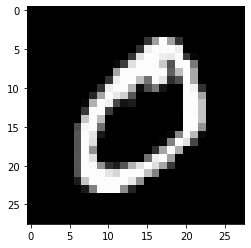

In [14]:
i = 1
init = x_train[i:i+1,:]
target = x_shift[i:i+1,:]
plt.imshow(init.reshape(*dims))

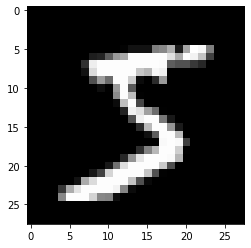

In [15]:
#Show Target
plt.imshow(target.reshape(*dims))

In [37]:
decoded_images = init
for i in range(1):
    decoded_images = autoencoder.predict(decoded_images)

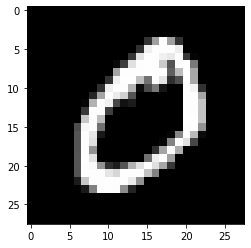

In [38]:
plt.imshow(decoded_images.reshape(*dims))